In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cycler
import pandas as pd
import numpy as np
import os
import sys

In [2]:
df1 = pd.read_csv('restotal3.txt', sep=',')

In [26]:
#Convert columns to numeric
num_cols = ['cpus_load','cpus_service', 'concurrency', 'lat_avg', 'lat_stdev', 'lat_max','req_avg', 'req_stdev', 'req_max', 'tot_requests', 'tot_duration','read', 'err_connect', 'err_read', 'err_write', 'err_timeout','req_sec_tot', 'read_tot', 'user_cpu', 'kern_cpu', 'mem_kb_uss','mem_kb_pss', 'mem_kb_rss', 'duration']
for col in num_cols: 
    df1[col]=pd.to_numeric(df1[col])

df1['total_cpu']=df1['user_cpu']+df1['kern_cpu']
    
#Add avg and sem
grouped_df=df1.groupby(['description','asyncservice','asyncdriver','cpus_load','cpus_service','concurrency']).agg(['mean','min','max','sem']).reset_index()
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()
grouped_df

,index,description_,asyncservice_,asyncdriver_,cpus_load_,cpus_service_,concurrency_,lat_avg_mean,lat_avg_min,lat_avg_max,...,mem_kb_rss_max,mem_kb_rss_sem,duration_mean,duration_min,duration_max,duration_sem,total_cpu_mean,total_cpu_min,total_cpu_max,total_cpu_sem
0,0,Web MVC JDBC,no,no,4,4,4,0.343537,0.32002,0.37889,...,1650604,3358.425030,60,60,60,0.0,15236.944444,15098,15428,23.630803
1,1,Web MVC JDBC,no,no,4,4,50,5.368889,5.03000,5.67000,...,1684288,2898.510367,60,60,60,0.0,23047.388889,9682,23879,786.209418
2,2,Web MVC JDBC,no,no,4,4,100,14.574444,13.55000,15.61000,...,1761260,3841.814819,60,60,60,0.0,23844.722222,23817,23873,5.106580
3,3,Web MVC JDBC,no,no,4,4,150,26.482222,21.67000,29.10000,...,1762176,4512.434643,60,60,60,0.0,23864.388889,23816,23893,4.524544
4,4,Web MVC JDBC,no,no,4,4,200,39.845000,34.50000,44.53000,...,1800372,4389.397008,60,60,60,0.0,23858.666667,23814,23886,5.546005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,WebFlux R2DBC,yes,yes,4,4,600,40.113889,36.53000,44.65000,...,1729576,1703.239113,60,60,60,0.0,23421.444444,23347,23483,9.309922
60,60,WebFlux R2DBC,yes,yes,4,4,700,45.818889,42.71000,51.09000,...,1734220,2314.914578,60,60,60,0.0,23402.944444,23352,23453,5.704872
61,61,WebFlux R2DBC,yes,yes,4,4,800,51.791111,47.61000,60.01000,...,1758908,2351.020894,60,60,60,0.0,23422.166667,23357,23479,7.455423
62,62,WebFlux R2DBC,yes,yes,4,4,900,56.552222,53.19000,59.73000,...,1736496,1891.368164,60,60,60,0.0,23408.388889,23353,23462,7.040564


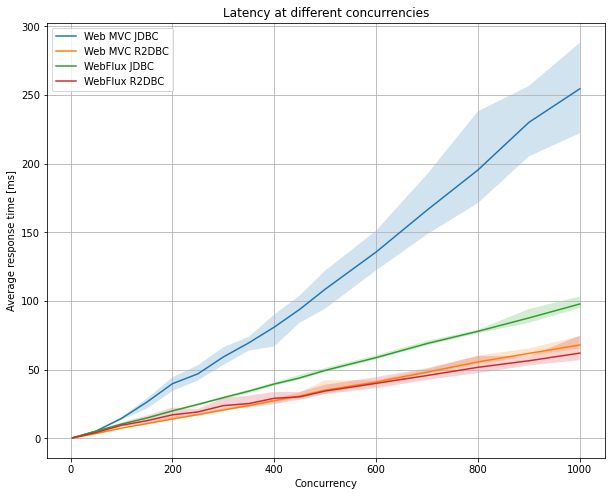

In [24]:
plt.close('all')
figure(num=None, figsize=(10, 8))

def custom_plot(x, y, ymin, ymax, **kwargs):
    ax = kwargs.pop('ax', plt.gca())
    base_line, = ax.plot(x, y, **kwargs)
    ax.fill_between(x, ymin, ymax, facecolor=base_line.get_color(), alpha=0.2)

for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['lat_avg_mean'], 'ymin': plot_data['lat_avg_min'],'ymax': plot_data['lat_avg_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Latency at different concurrencies')
plt.ylabel('Average response time [ms]')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

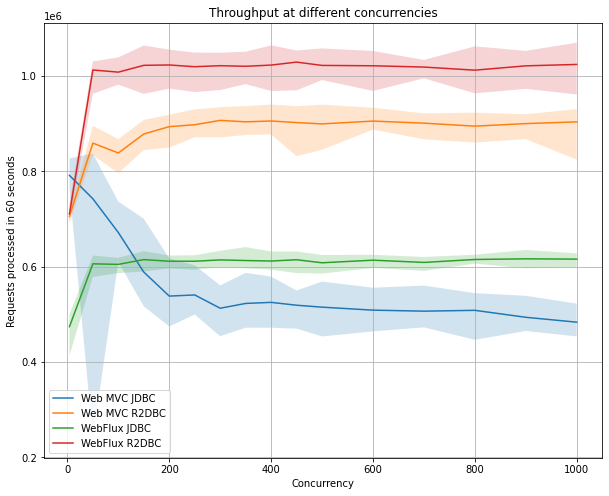

In [23]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['tot_requests_mean'], 'ymin': plot_data['tot_requests_min'],'ymax': plot_data['tot_requests_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Throughput at different concurrencies')
plt.ylabel('Requests processed in 60 seconds')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

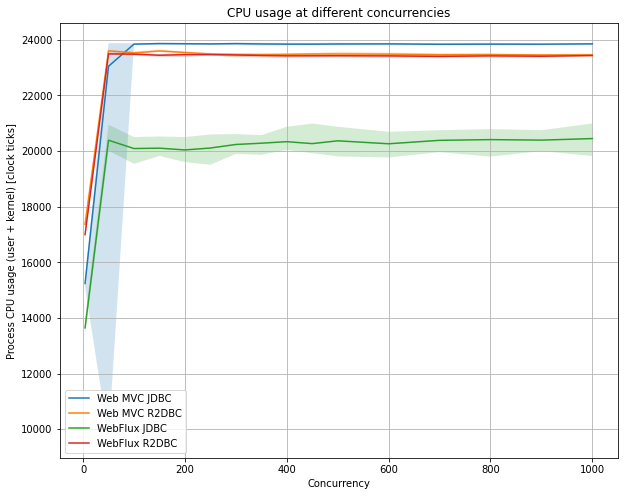

In [22]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['total_cpu_mean'], 'ymin': plot_data['total_cpu_min'],'ymax': plot_data['total_cpu_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('CPU usage at different concurrencies')
plt.ylabel('Process CPU usage (user + kernel) [clock ticks]')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

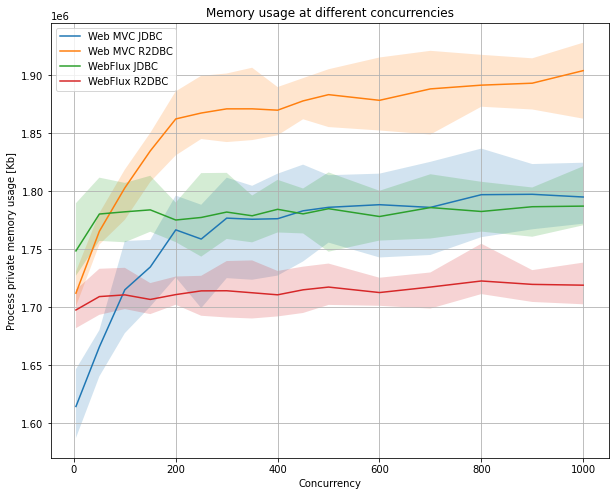

In [21]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['mem_kb_uss_mean'], 'ymin': plot_data['mem_kb_uss_min'],'ymax': plot_data['mem_kb_uss_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Memory usage at different concurrencies')
plt.ylabel('Process private memory usage [Kb]')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()